In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

In [17]:
dfpep = pd.read_csv("/Users/zachazherman/Documents/4th Year Classes/MA477/PEP.csv")

In [18]:
dfpep.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [35]:
dfpep = dfpep.assign(Intradayreturn=lambda x: (x.Close/x.Open - 1))
dfpep

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Intradayreturn
0,2018-11-07,115.449997,115.769997,114.440002,115.610001,100.327774,4219600,0.001386,0.001386
1,2018-11-08,115.379997,116.500000,115.250000,116.059998,100.718292,2925100,0.005894,0.005894
2,2018-11-09,116.080002,117.709999,116.080002,117.480003,101.950584,5026300,0.012061,0.012061
3,2018-11-12,117.000000,118.320000,116.709999,116.970001,101.507988,4781900,-0.000256,-0.000256
4,2018-11-13,117.750000,117.750000,116.209999,117.139999,101.655510,3609900,-0.005180,-0.005180
...,...,...,...,...,...,...,...,...,...
1252,2023-10-31,162.949997,163.350006,161.660004,163.279999,163.279999,5947400,0.002025,0.002025
1253,2023-11-01,163.669998,165.429993,162.759995,164.869995,164.869995,6682500,0.007332,0.007332
1254,2023-11-02,164.740005,167.160004,164.669998,166.830002,166.830002,5413400,0.012687,0.012687
1255,2023-11-03,168.679993,168.809998,166.690002,166.789993,166.789993,4063000,-0.011205,-0.011205


In [49]:
overnightreturns = []
amountrows = 1257
# Loop over each ticker
for i in range(0,amountrows):
    #Calculate the overnight return
    if i != 0:
        ret = (dfpep.iat[int(i), 1] - dfpep.iat[int(i-1), 4]) / dfpep.iat[int(i-1), 4]
        overnightreturns.append(ret)
    else:
        ret = 0
        overnightreturns.append(ret)

dfpep['overnight_return'] = pd.Series(overnightreturns)
dfpep['daily_return'] = dfpep['overnight_return'] + dfpep['Intradayreturn']
dfpep

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Intradayreturn,overnight_return,daily_return
0,2018-11-07,115.449997,115.769997,114.440002,115.610001,100.327774,4219600,0.001386,0.001386,0.000000,0.001386
1,2018-11-08,115.379997,116.500000,115.250000,116.059998,100.718292,2925100,0.005894,0.005894,-0.001989,0.003904
2,2018-11-09,116.080002,117.709999,116.080002,117.480003,101.950584,5026300,0.012061,0.012061,0.000172,0.012233
3,2018-11-12,117.000000,118.320000,116.709999,116.970001,101.507988,4781900,-0.000256,-0.000256,-0.004086,-0.004342
4,2018-11-13,117.750000,117.750000,116.209999,117.139999,101.655510,3609900,-0.005180,-0.005180,0.006668,0.001488
...,...,...,...,...,...,...,...,...,...,...,...
1252,2023-10-31,162.949997,163.350006,161.660004,163.279999,163.279999,5947400,0.002025,0.002025,0.004129,0.006154
1253,2023-11-01,163.669998,165.429993,162.759995,164.869995,164.869995,6682500,0.007332,0.007332,0.002389,0.009720
1254,2023-11-02,164.740005,167.160004,164.669998,166.830002,166.830002,5413400,0.012687,0.012687,-0.000788,0.011898
1255,2023-11-03,168.679993,168.809998,166.690002,166.789993,166.789993,4063000,-0.011205,-0.011205,0.011089,-0.000116


In [52]:
print(dfpep["daily_return"].mean())
print(dfpep["daily_return"].std())

0.00038469341970763917
0.01379114270859541


In [20]:
# Parameters for the bull market regime
mu_bull = 0.0006  # Mean return
volatility_bull = 0.01  # Volatility

# Parameters for the bear market regime
mu_bear = -0.0003  # Mean return
volatility_bear = 0.03  # Volatility



In [60]:
# Transition probabilities
p_bull_to_bull = 0.7
p_bear_to_bear = 0.9

In [61]:
# Initial state
current_state = "bull"
num_simulations = 100
initialprice = 100
num_days = 252
simulated_prices = np.zeros((num_simulations, num_days))

In [62]:
for i in range(num_simulations):
    current_state = "bull"
    daily_returns = np.zeros(num_days)
    for day in range(num_days):t
        if current_state == "bull":
            return_bull = np.random.normal(mu_bull, volatility_bull)
            daily_returns[day] = return_bull

            if np.random.rand() > p_bull_to_bull:
                current_state = "bear"
        else:
            return_bear = np.random.normal(mu_bear, volatility_bear)
            daily_returns[day] = return_bear

            if np.random.rand() > p_bear_to_bear:
                current_state = "bull"
    simulated_prices[i] = initial_price * np.cumprod(1 + daily_returns)
    


In [65]:
np.cumprod(1 + daily_returns) 
simulated_prices

array([[1.07234087e+02, 1.45262147e+02, 1.97457081e+02, ...,
        9.02016769e-01, 7.57047235e-01, 4.59090271e-01],
       [1.08183216e+02, 7.06075815e+01, 4.88023288e+01, ...,
        1.13557357e+05, 1.13385627e+05, 1.21889013e+05],
       [1.24494483e+02, 1.67241763e+02, 8.92430017e+01, ...,
        2.41327870e+00, 3.12997713e+00, 3.21681409e+00],
       ...,
       [8.51967317e+01, 9.10214517e+01, 7.52185979e+01, ...,
        7.49199293e+00, 5.70399831e+00, 7.12900268e+00],
       [9.19354069e+01, 8.26685983e+01, 1.12145428e+02, ...,
        2.51001377e+01, 2.72492469e+01, 2.61424263e+01],
       [7.90800295e+01, 7.03071617e+01, 8.26572602e+01, ...,
        5.11226498e+04, 3.91502592e+04, 3.37002514e+04]])

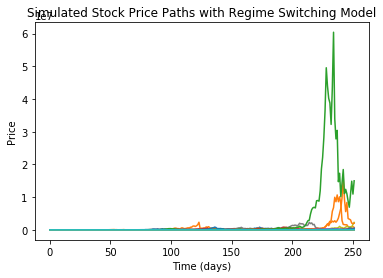

In [63]:
for i in range(num_simulations):
    plt.plot(simulated_prices[i])

plt.title("Simulated Stock Price Paths with Regime Switching Model")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.show()

